# **Day1 -> 13th October 2021**.


In [109]:
! pip install -q 'gwosc==0.5.4'

In [110]:
import gwosc

##Quering for event info :

gwosc.datsets lib provides tools for searching for datasets, including events, catalogs and full run strain data releases.

In [111]:
import gwosc.datasets

In [112]:
from gwosc.datasets import find_datasets

In [113]:
from gwosc import datasets

In [114]:
# Print list of all available catalogs from the datasets:

print("Catalogs :")
print(find_datasets(type="catalogs"))

Catalogs :
['GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'Initial_LIGO_Virgo', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal']


In [115]:
# Print all the events from the GWTC-1 catalog

gwtc1 = datasets.find_datasets(type = "events", catalog="GWTC-1-confident")
print("GWTC-1 events :", gwtc1)

GWTC-1 events : ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


In [116]:
# Print strain data sets from ligo/virgo data sets 

runs = find_datasets(type = "run")

print("Strain data sets : ", runs)

Strain data sets :  ['BKGW170608_16KHZ_R1', 'O1', 'O1_16KHZ', 'O2_16KHZ_R1', 'O2_4KHZ_R1', 'O3a_16KHZ_R1', 'O3a_4KHZ_R1', 'S5', 'S6']


In [117]:
# Print data sets from detector 'L1' and small segment (i.e. GPS time)

print(find_datasets(type = "events", catalog = "GWTC-1-confident", detector = "L1", segment = (1164556817, 1187733618)))

['GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


In [118]:
# gwosc.datasets.event_gps lib is used to query out the specific gps time of the events (GW170608 and GW190425)

from gwosc.datasets import event_gps
gps = event_gps("GW170608")
gps1 = event_gps("GW190425")
print("gps :", (gps,gps1))

gps : (1180922494.5, 1240215503.0)


In [119]:
# gps time interval for an observing runs

from gwosc.datasets import run_segment
print(run_segment("O1"))

(1126051217, 1137254417)


In [120]:
# Confident events in O1 :

O1 = datasets.find_datasets(type = "events", catalog = "GWTC-1-confident", segment = run_segment("O1"))
print(O1)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2']


##Querying for data files

 Use gwosc.locate lib to find the urls of data files associated with the datasets

In [121]:
from gwosc.locate import get_event_urls
urls = get_event_urls("GW150914")
print("url :", urls)

url : ['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


In [122]:
# Print urls of specific details (specify)

urls = get_event_urls("GW151012", duration = "32", detector = "V3")
print("urls :", urls)

urls : []


## Exercises:


1.   How many months did O2 last?
2.   How many GWTC-1-confident events were detected during O1?
3.   What file URL contains data for V1 4096 seconds around GW170817?



In [123]:
# 2. Confident events in O1

O1 = datasets.find_datasets(type = "events", catalog = "GWTC-1-confident", segment = run_segment("O1"))
print(O1)

# 3. url data for V1 4096 sec around GW170817

urls_1  = get_event_urls("GW170817", duration = 4096, detector = "V1")
print(urls_1)

# 1 O2:

O2 = "O2_4KHZ_R1"
print(run_segment(O2))

time = 1187733618 - 1164556817

print ("Run segment of O2", time/(3600*30*24))







['GW150914-v3', 'GW151012-v3', 'GW151226-v2']
['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170817/v3/V-V1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']
(1164556817, 1187733618)
Run segment of O2 8.941667052469136


#**Day 2 -> 14th October 2021:**

GWpy:

#**DATA in time domain**

In [124]:
! ! pip install -q 'gwpy==2.0.2'

In [125]:
import gwpy

In [126]:
print(gwpy.__version__)

2.0.2


In [127]:
gps = event_gps('GW190412')

print(gps)

1239082262.2


In [128]:
segment = (int(gps)-5, int(gps)+5)
print(segment)

(1239082257, 1239082267)


#**Day 3 -> 18th October 2021**

In [129]:
def from_gps(gps):
    try:
        gps = LIGOTimeGPS(gps)
    except (ValueError, TypeError, RuntimeError):
        gps = LIGOTimeGPS(float(gps))
    sec, nano = gps.gpsSeconds, gps.gpsNanoSeconds
    try:
        date = Time(sec, format='gps', scale='utc').datetime
    except ValueError as exc:
        if "within a leap second" in str(exc):
            exc.args = (
                "cannot represent leap second using datetime.datetime, "
                "consider using "
                "astropy.time.Time({}, format=\"gps\", scale=\"utc\") "
                "directly".format(gps),
            )
        raise
    return date + datetime.timedelta(microseconds=nano*1e-3)



## 1. 'G1' - GEO600
## 2. 'H1' - LIGO-Hanford
## 3. 'L1' - LIGO-Livingston
## 4. 'V1' - (Advanced) Virgo 



In [130]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(data)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
TimeSeries([-8.42599982e-19, -8.52439382e-19, -8.60740967e-19,
            ...,  1.38851953e-19,  1.37762006e-19,
             1.38095492e-19]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


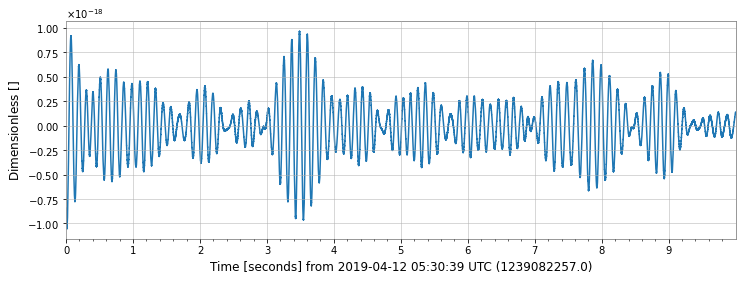

In [131]:
%matplotlib inline
plot = data.plot()

#**Data in Frequency Domain**

Fourier transform : exposes the frequency domain content of a time domain of the signal.


In [132]:
fft = data.fft()
print(fft)

FrequencySeries([-1.45894353e-21+0.00000000e+00j,
                 -2.91834811e-21-4.52905623e-23j,
                 -2.91973217e-21-9.06203059e-23j, ...,
                 -2.38724887e-23+4.67871321e-26j,
                 -2.38346268e-23+1.80394122e-26j,
                 -2.38458080e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1239082257.0,
                name: Strain,
                channel: None)


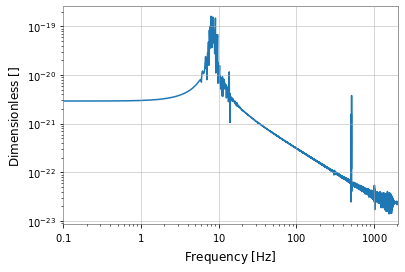

In [133]:
plot = fft.abs().plot(xscale="log", yscale="log")
plot.show(warn=False)

The fft assumes that the data is periodic, which means that the edges of the data look like discontinuities when transformed. So apply a window function to the time domain data before tranforming it. Use scipy.signal module and import get_window from it. 

In [134]:
# window function:

from scipy.signal import get_window
window = get_window('hann', data.size)
lwin = data * window

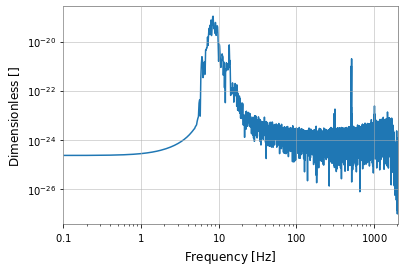

In [135]:
# transforming the signal into frequency domain:

fftamp = lwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

#**Power Spectral Density**

**Welch's method** is used to calcualate the power of a signal at different frequencies. The method is based on the concept of using periodogram spectrum estimates, which are the result of converting a signal from the time domain to the frequency domain. Welch's method is an improvement on the standard periodogram spectrum estimating method and on Bartlett's method, in that it reduces noise in the estimated power spectra in exchange for reducing the frequency resolution. Due to the noise caused by imperfect and finite data, the noise reduction from Welch's method is often desired.

### **Procedure to calculate the PSD:**

1. The signal is split up into overlapping segments: the original data segment is split up into L data segments of length M, overlapping by D points.
     1. If D = M / 2, the overlap is said to be 50%
     2. If D = 0, the overlap is said to be 0


 2. The overlapping segments are then windowed: After the data is split up into overlapping segments, the individual L data segments have a window applied to them (in the time domain).

     1. Most window functions afford more influence to the data at the center of the set than to data at the edges, which represents a loss of information. To mitigate that loss, the individual data sets are commonly overlapped in time (as in the above step).

     2. The windowing of the segments is what makes the Welch method a "modified" periodogram. 

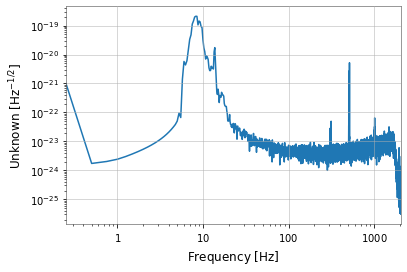

In [136]:
# fft plot. "ASD" is used to study the frequency domain sensitivity of a Gw detector.

asd = data.asd(fftlength=4, method="median")         
plot = asd.plot()
plot.show(warn=False)

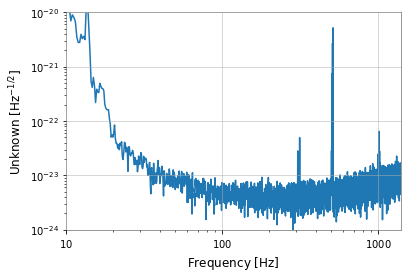

In [137]:
# fft plot from 10Hz to 1000Hz.

ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot

In [138]:
# Loading more data for more ffts to be averaged out. Can analyse in more details.

segment1 = (int(gps)-400, int(gps)+400)
print(segment1)

(1239081862, 1239082662)


In [139]:
data2 = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(data2)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
TimeSeries([-8.42599982e-19, -8.52439382e-19, -8.60740967e-19,
            ...,  1.38851953e-19,  1.37762006e-19,
             1.38095492e-19]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [140]:
asd1 = data2.asd(fftlength=8, method="median")

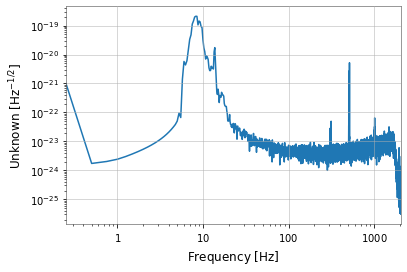

In [141]:
plot = asd.plot()

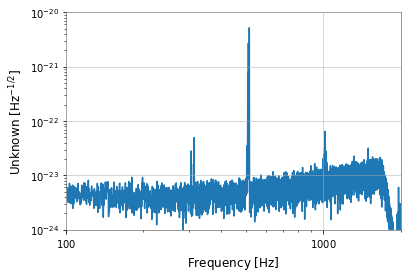

In [142]:
ax = plot.gca()
ax.set_xlim(100, 2000)
ax.set_ylim(1e-24, 1e-20)
plot

Fetched 1 URLs from www.gw-openscience.org for [1239081862 .. 1239082662))
Reading data... [Done]
Ligo-Hanford : TimeSeries([-3.42589875e-19, -3.43634108e-19, -3.38996775e-19,
            ..., -4.40490128e-19, -4.38564550e-19,
            -4.40217026e-19]
           unit: dimensionless,
           t0: 1239081862.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
Ligo-Virgo : TimeSeries([-4.14628280e-20, -2.16068322e-20,  8.49382876e-21,
            ...,  1.97669207e-20, -7.11263366e-21,
            -2.44333694e-20]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


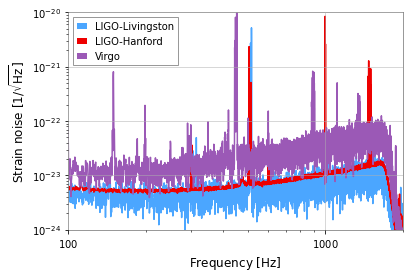

In [143]:
# Comparing with different detectors keeping the same configurations.

# Ligo-Hanford
Hdata = TimeSeries.fetch_open_data('H1', *segment1, verbose = True)
print('Ligo-Hanford :', Hdata)
hasd = Hdata.asd(fftlength=4, method="median")

# Ligo-Virgo
Vdata = TimeSeries.fetch_open_data('V1', *segment, verbose = True)
print('Ligo-Virgo :', Vdata)
vasd = Vdata.asd(fftlength=4, method="median")

ax.plot(hasd, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(vasd, label='Virgo', color='gwpy:virgo')

lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')  
lline.set_label('LIGO-Livingston')
plot

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot


The peak amplitude in the LIGO-Livingston data occurs at approximately 5 seconds into the plot above and is undetectable above the background noise by the eye. Plot the data for the LIGO-Hanford detector around GW190412. Looking at your new LIGO-Handford plot, can your eye identify a signal peak?

(1239081862, 1239082662)
Fetched 1 URLs from www.gw-openscience.org for [1239081862 .. 1239082662))
Reading data... [Done]
TimeSeries([-3.42589875e-19, -3.43634108e-19, -3.38996775e-19,
            ..., -4.40490128e-19, -4.38564550e-19,
            -4.40217026e-19]
           unit: dimensionless,
           t0: 1239081862.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


FrequencySeries([2.64734760e-24+0.00000000e+00j,
                 5.29469460e-24+7.86249693e-28j,
                 5.29469566e-24+1.58150526e-27j, ...,
                 3.43793743e-26-4.64482949e-27j,
                 2.83461010e-26+4.84956578e-27j,
                 3.40805409e-26+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.00125 Hz,
                epoch: 1239081862.0,
                name: Strain,
                channel: None)


No handles with labels found to put in legend.


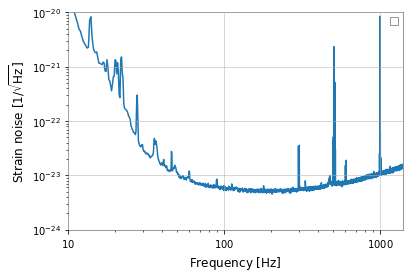

In [144]:
gps = event_gps('GW190412')

hsegment = (int(gps)-400, int(gps)+400)
print(hsegment)

hdata2 = TimeSeries.fetch_open_data('H1', *hsegment, verbose = True)
print(hdata2)

%matplotlib inline
plot = hdata2.plot()
plot


fft = hdata2.fft()
print(fft)

plot1 = fft.abs().plot(xscale="log", yscale="log")
plot1.show(warn=False)

hasd2 = hdata2.asd(fftlength=4, method="median")         
plot2 = hasd2.plot()
plot2.show(warn=False)

ax = plot2.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()


Make an ASD around the time of an O1 event, GW150914 for L1 detector.  Compare this with the ASDs around GW190412 for L1 detector.  Which data have lower noise - and so are more sensitive - around 100 Hz?

(1126258862, 1126260062)
Fetched 1 URLs from www.gw-openscience.org for [1126258862 .. 1126260062))
Reading data... [Done]
TimeSeries([-1.32667267e-18, -1.33092958e-18, -1.34311735e-18,
            ..., -9.36851342e-19, -9.29072758e-19,
            -8.91527139e-19]
           unit: dimensionless,
           t0: 1126258862.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


FrequencySeries([-1.05513656e-18+0.00000000e+00j,
                 -7.62918302e-22+1.96067025e-21j,
                  5.29488218e-22+8.15412613e-22j, ...,
                 -9.90963552e-26-7.85885510e-27j,
                 -8.51257811e-26+3.29079178e-27j,
                 -8.92643344e-26+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.0008333333333333334 Hz,
                epoch: 1126258862.0,
                name: Strain,
                channel: None)


No handles with labels found to put in legend.


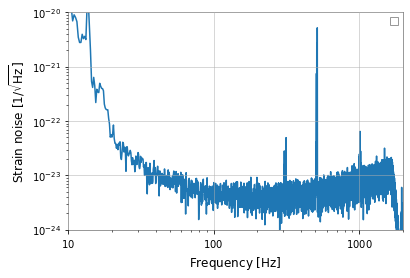

In [145]:
gps = event_gps('GW150914')

lsegment = (int(gps)-600, int(gps)+600)
print(lsegment)

ldata2 = TimeSeries.fetch_open_data('L1', *lsegment, verbose = True)
print(ldata2)

%matplotlib inline
plot = ldata2.plot()


fft = ldata2.fft()
print(fft)

plot1 = fft.abs().plot(xscale="log", yscale="log")
plot1.show(warn=False)


lasd2 = ldata2.asd(fftlength=4, method="median")         
plot2 = asd.plot()
plot2.show(warn=False)

ax = plot2.gca()
ax.set_xlim(10, 2000)
ax.set_ylim(1e-24, 1e-20)

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()



(10, 2000)

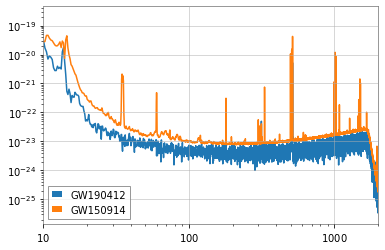

In [146]:
import pylab as plt

plt.loglog(asd, label = 'GW190412')
plt.loglog(lasd2,label = 'GW150914')
plt.legend()
plt.xlim(10,2000)

#**Q Transforms**

Plotting a Spectrogram

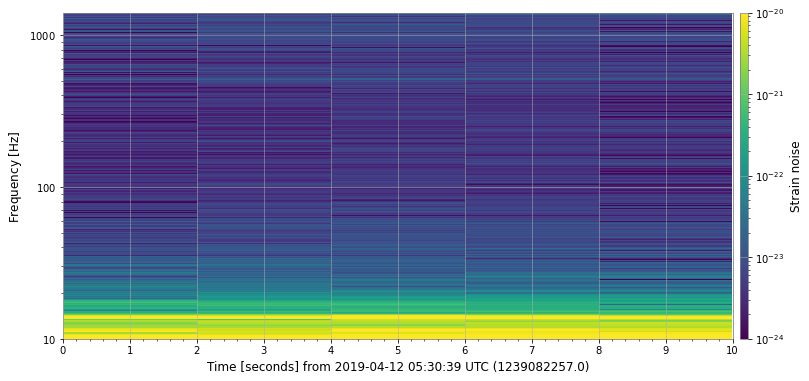

In [147]:
spec = data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = spec.plot()

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise",
)



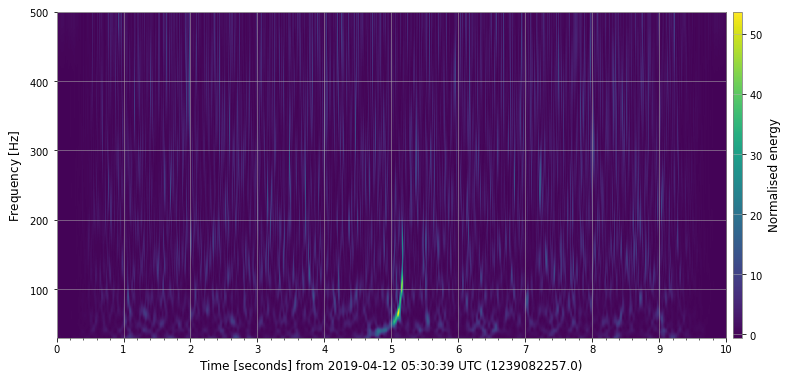

In [148]:
hq = data.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")


# Q-transforms returns normalised energy.

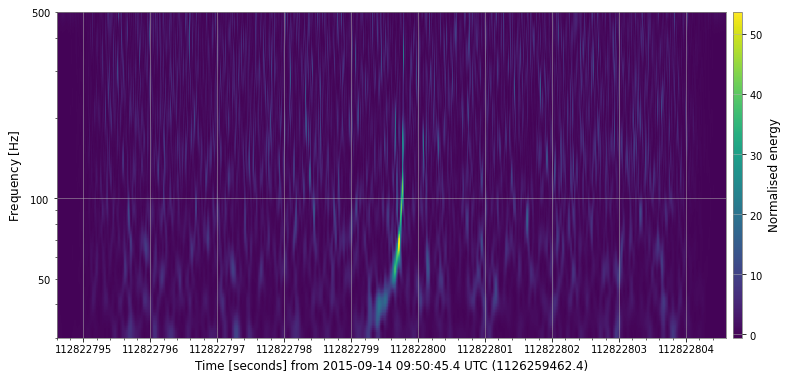

In [149]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot  # refresh

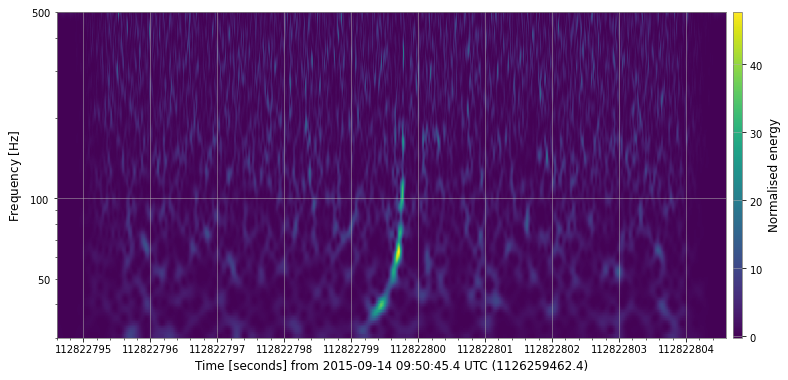

In [150]:
hq = data.q_transform(frange=(30, 500), qrange=(16, 32))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")


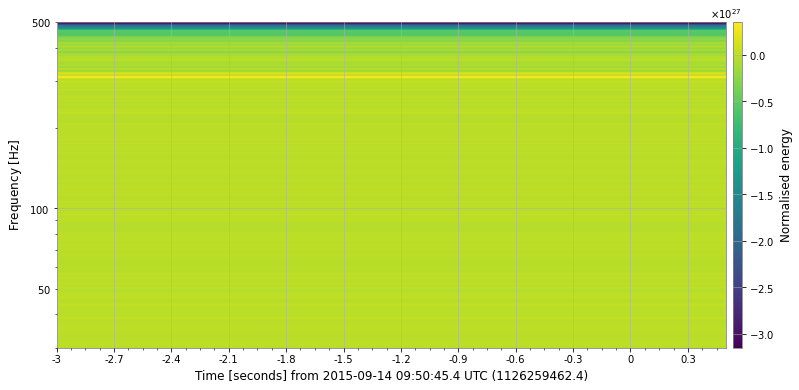

In [151]:
hq2 = data.q_transform(frange=(30, 500), qrange=(100, 110), outseg=(gps-3,gps+0.5)) # outseg is for zoom in around merger
plot = hq2.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

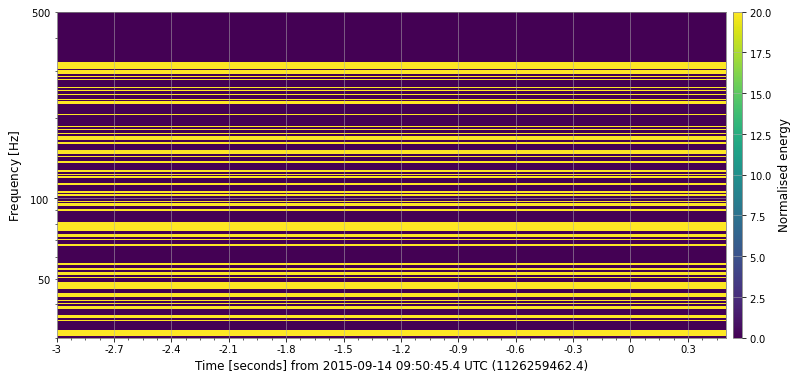

In [152]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

##Generating waveforms

The waveform can be generated as a time series using **get_td_waveform()**. There are some additional examples using this interface here. The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to use. A variety of approximants are available that include different physical effects.

**SEOBNRv4_opt' approximant** : It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbit (aligned spin).



In [153]:
! pip install -q 'PyCBC==1.18.0' 'lalsuite==6.82'

In [154]:
from pycbc.waveform import get_td_waveform
import pylab

In [155]:
hp, hc = get_td_waveform(approximant = 'SEOBNRv4_opt',  mass1 = 10, mass2 = 10, delta_t = 1.0/16384, f_lower = 30)

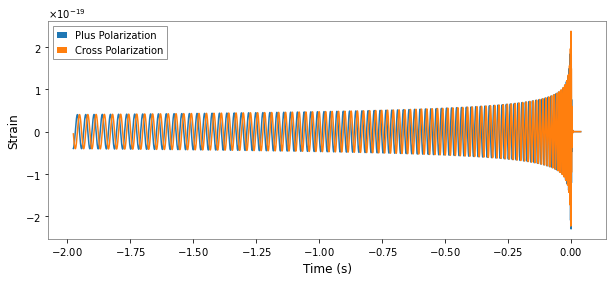

In [156]:
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

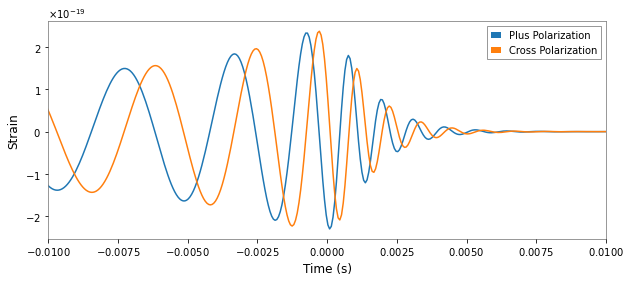

In [157]:
# Zoom in near the merger time.

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

##MASS1 = 10 , MASS2 = 30


In [158]:
hp1, hc1 = get_td_waveform(approximant = 'SEOBNRv4_opt',  mass1 = 10, mass2 = 30, delta_t = 1.0/4096, f_lower = 30)

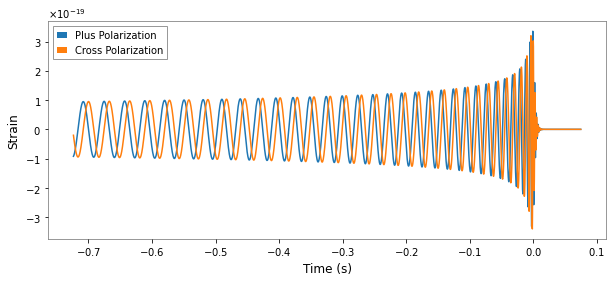

In [159]:
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp1.sample_times, hp1, label='Plus Polarization')
pylab.plot(hp1.sample_times, hc1, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

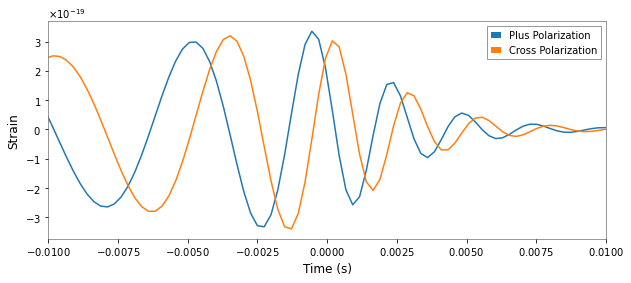

In [160]:
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp1.sample_times, hp1, label='Plus Polarization')
pylab.plot(hp1.sample_times, hc1, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

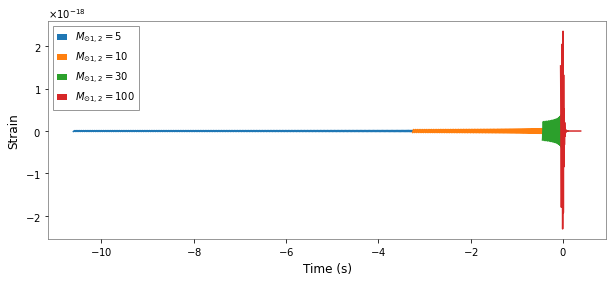

In [161]:
pylab.figure(figsize=pylab.figaspect(0.4))
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/16384,
                         f_lower=25)
    
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

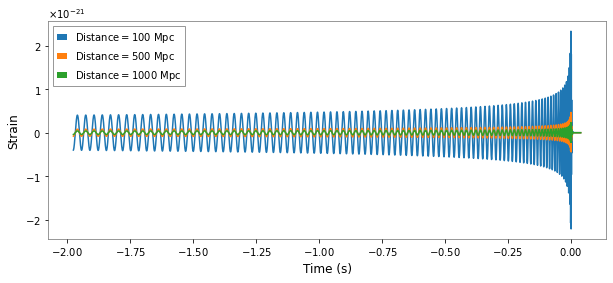

In [162]:
# Changing the distance of the waveform.

pylab.figure(figsize=pylab.figaspect(0.4))
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)
    
    pylab.plot(hp.sample_times, hp, label='Distance$=%s$ Mpc' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

##**PYCBC Tutrial**##

##**Matched Filtering**## 

Matched filtering as a cross-correlation, in both the time domain and the frequency domain. 

In [163]:
! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0'

In [164]:
import numpy
import pylab

In [165]:
sample_rate = 1024  # samples per second
data_length = 1024  # seconds

#white noise in data series and time series

data = numpy.random.normal(size=[sample_rate * data_length]) 
times = numpy.arange(len(data)) / float(sample_rate)

In [166]:
from pycbc.waveform import get_td_waveform

apx = 'IMRPhenomD'

##get_td_waveform returns both $h_+$ and $h_{\times}$, but we'll only use $h_+$ for now.

In [167]:
hp1, _ = get_td_waveform(approximant = apx , mass1 = 10, mass2 = 10, delta_t = 1.0/sample_rate, f_lower = 30)

**Correlation** is useful to calculate because it can tell us if the values of one time series are predictive of the future values of another time series.

In [168]:
#  Cross - Correlation of the signal with white noise.
hp1 = hp1 / max(numpy.correlate(hp1, hp1, mode='full'))**0.5

Text(0, 0.5, 'Normalized amplitude')

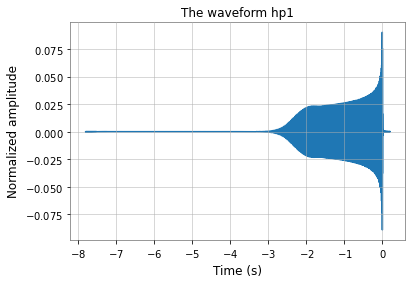

In [169]:
pylab.figure()
pylab.title("The waveform hp1")
pylab.plot(hp1.sample_times, hp1)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

In [170]:
# Shift the waveform to start at a random time in the Gaussian noise data.
# to simulate a real-life situation where you don’t know where the signal will be
waveform_start = numpy.random.randint(0, len(data) - len(hp1))
data[waveform_start:waveform_start+len(hp1)] += 10 * hp1.numpy()

Text(0, 0.5, 'Normalized amplitude')

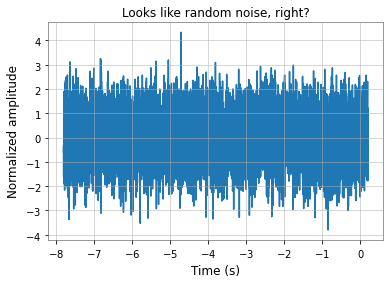

In [171]:
pylab.figure()
pylab.title("Looks like random noise, right?")
pylab.plot(hp1.sample_times, data[waveform_start:waveform_start+len(hp1)])
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

Text(0, 0.5, 'Normalized amplitude')

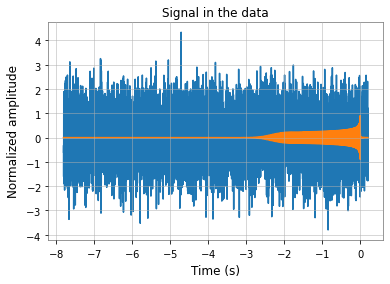

In [172]:
pylab.figure()
pylab.title("Signal in the data")
pylab.plot(hp1.sample_times, data[waveform_start:waveform_start+len(hp1)])
pylab.plot(hp1.sample_times, 10 * hp1)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

In [173]:
import pycbc.noise
import pycbc.psd

In [174]:
flow = 10.0
delta_f = 1.0 / 128
flen = int(sample_rate / (2 * delta_f)) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

In [175]:
flen = int(sample_rate / (2 * delta_f)) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

In [176]:
# Coloured noise
delta_t = 1.0 / sample_rate
ts = pycbc.noise.noise_from_psd(data_length*sample_rate, delta_t, psd, seed=127)

In [177]:
seg_len = int(4 / delta_t)
seg_stride = int(seg_len / 2)
estimated_psd = pycbc.psd.welch(ts,seg_len=seg_len,seg_stride=seg_stride)

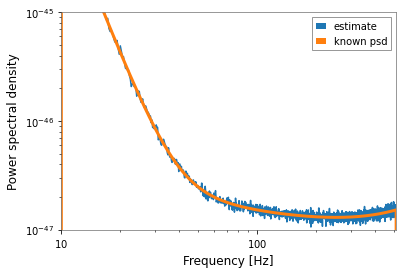

In [178]:
pylab.loglog(estimated_psd.sample_frequencies, estimated_psd, label='estimate')
pylab.loglog(psd.sample_frequencies, psd, linewidth=3, label='known psd')
pylab.xlim(xmin=flow, xmax=512)
pylab.ylim(1e-47, 1e-45)
pylab.xlabel('Frequency [Hz]')
pylab.ylabel('Power spectral density')
pylab.legend()
pylab.grid()
pylab.show()

In [179]:
ts[waveform_start:waveform_start+len(hp1)] += hp1.numpy() * 1E-20

In [180]:
from pycbc.types import TimeSeries

# The PSD, sampled properly for the noisy data
flow = 10.0
delta_f = 1.0 / data_length
flen = int(sample_rate / (2 * delta_f)) + 1
psd_td = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, 0)

# The PSD, sampled properly for the signal
delta_f = sample_rate / float(len(hp1))
flen = int(sample_rate / (2 * delta_f)) + 1
psd_hp1 = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, 0)

# The 0th and Nth values are zero. Set them to a nearby value to avoid dividing by zero.
psd_td[0] = psd_td[1]
psd_td[len(psd_td) - 1] = psd_td[len(psd_td) - 2]
# for the PSD sampled for the signal
psd_hp1[0] = psd_hp1[1]
psd_hp1[len(psd_hp1) - 1] = psd_hp1[len(psd_hp1) - 2]

data_whitened = (ts.to_frequencyseries() / psd_td**0.5).to_timeseries()
hp1_whitened = (hp1.to_frequencyseries() / psd_hp1**0.5).to_timeseries() * 1E-21

Text(0, 0.5, 'Cross-correlation')

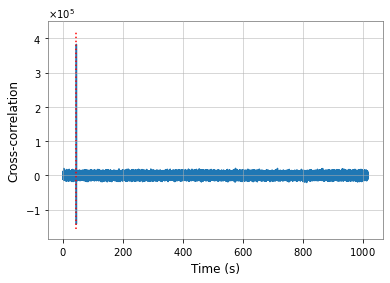

In [181]:
cross_correlation = numpy.zeros([len(data)-len(hp1)])
hp1n = hp1_whitened.numpy()
datan = data_whitened.numpy()
for i in range(len(datan) - len(hp1n)):
    cross_correlation[i] = (hp1n * datan[i:i+len(hp1n)]).sum()

pylab.figure()
times = numpy.arange(len(datan) - len(hp1n)) / float(sample_rate)
pylab.plot(times, cross_correlation)
pylab.plot([waveform_start/float(sample_rate), waveform_start/float(sample_rate)],
           [(min(cross_correlation))*1.1,(max(cross_correlation))*1.1],'r:')
pylab.xlabel('Time (s)')
pylab.ylabel('Cross-correlation')

##**Looking for a specific signal in the data**

In [186]:
%matplotlib inline

import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

"GW150914" data:

In [187]:
merger = Merger("GW150914")

The Hanford detector.

In [188]:
strain = merger.strain('H1')

Removing the low frequency content and downsampling the data to 2048Hz.

In [189]:
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

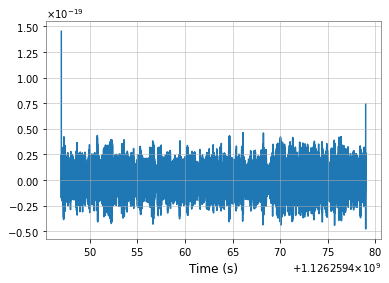

In [190]:
pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

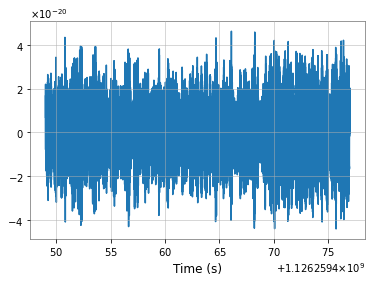

In [192]:
# Removing the 2s of data from the beginning and the end

conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [193]:
# Calcualte the Power Spectral density:

from pycbc.psd import interpolate, inverse_spectrum_truncation

In [198]:
psd = conditioned.psd(4)
# use 4 seconds of samples of 
#data of timeseries in Welsch methhod

In [200]:
psd = interpolate(psd, conditioned.delta_f) # interpolate it to match the data, and limit the filter length of 1/psd.

In [202]:
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate), low_frequency_cutoff=15) # cutoff freq = 15Hz,
# do not include the signal content below this frequency.

In [204]:
m = 36 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt", mass1 = m, mass2 = m, delta_t = conditioned.delta_t, f_lower = 20)
hp.resize(len(conditioned))                

Text(0, 0.5, 'Strain')

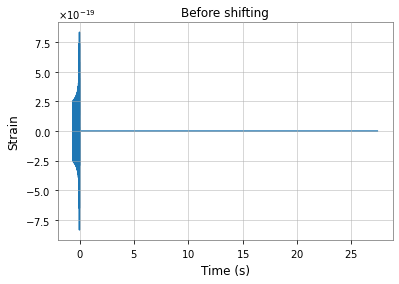

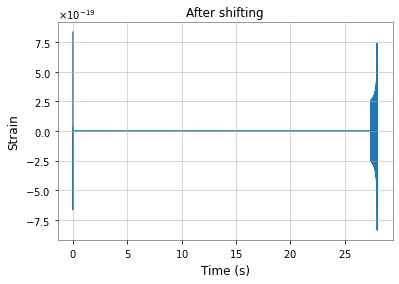

In [206]:
pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

# shift the timeseries.

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

In [207]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned, psd = psd, low_frequency_cutoff = 20)

In [208]:
snr = snr.crop(4 + 4, 4)

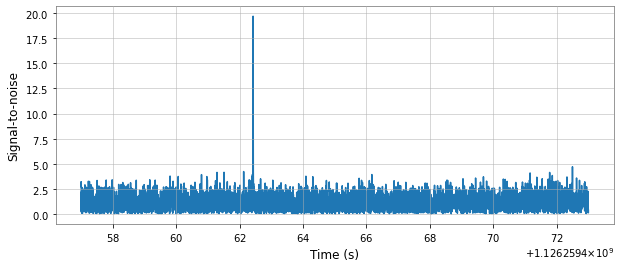

We found a signal at 1126259462.4248047s with SNR 19.687494866517284


In [209]:
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

In [210]:
from pycbc.filter import sigma

In [211]:
# Shift the template to the peak time 

dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

In [212]:
# Scale the template in such a way that the SNR is equal to 1 in the data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

In [213]:
# Scale the template amplitude and phase to the peak value.
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

In [215]:
# whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()
white_template = (aligned.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

In [216]:
# Select the time around the merger
white_data = white_data.time_slice(merger.time-.2, merger.time+.1)
white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

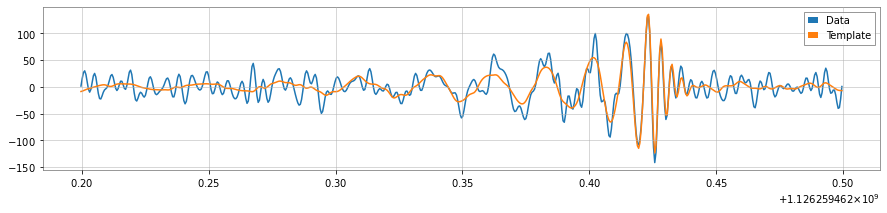

In [218]:
pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.show()

In [219]:
subtracted = conditioned - aligned

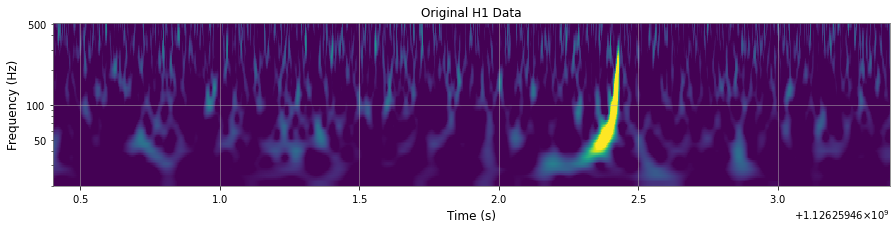

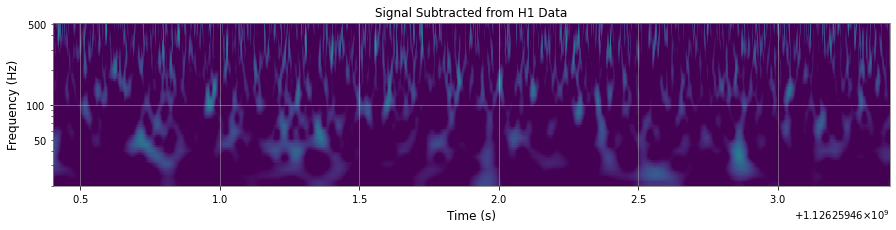

In [220]:
for data, title in [(conditioned, 'Original H1 Data'),(subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001, logfsteps=100, qrange=(8, 8), frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(merger.time - 2, merger.time + 1)
    pylab.show()

##**VIRGO** data:

In [221]:
m = Merger("GW170814")

ifos = ['H1', 'L1', 'V1']
data = {}
psd = {}

In [223]:
pylab.figure(figsize=[10, 5])

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

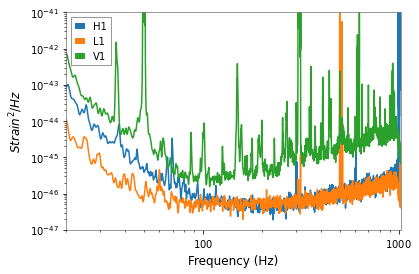

In [226]:
for ifo in ifos:
    # Read in and precondition the data
    ts = m.strain(ifo).highpass_fir(15, 512)
    data[ifo] = resample_to_delta_t(ts, 1.0/2048).crop(2, 2)

    # Estimate the power spectral density of the data
    # This chooses to use 2s samples in the PSD estimate.
    # One should note that the tradeoff in segment length is that
    # resolving narrow lines becomes more difficult.
    p = data[ifo].psd(2)
    p = interpolate(p, data[ifo].delta_f)
    p = inverse_spectrum_truncation(p, int(2 * data[ifo].sample_rate), low_frequency_cutoff=15.0)
    psd[ifo] = p
    
    pylab.plot(psd[ifo].sample_frequencies, psd[ifo], label=ifo)

pylab.yscale('log')
pylab.xscale('log')
pylab.ylim(1e-47, 1e-41)
pylab.xlim(20, 1024)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.grid()
pylab.legend()
pylab.show()


In [227]:
from pycbc.waveform import get_fd_waveform
from pycbc.filter import matched_filter


In [228]:
# Calculate the component mass of each black hole in the detector frame
cmass = (m.median1d("mass1")+m.median1d("mass2")) / 2      # This is in the source frame
cmass *= (1 + m.median1d("redshift")) # apply redshift to get to the detector frame


In [232]:
# This is a frequency domain waveform generator. It has a very similar syntax to the time domain
# waveform function used in prior tutorials. This function returns both a plus and a cross
# polarization waveform, but we will just use the plus polarization in building our template
# as these are only different by a phase offset in this specific case.
hp, _ = get_fd_waveform(approximant="IMRPhenomD",mass1=cmass, mass2=cmass, f_lower=20.0, delta_f=data[ifo].delta_f)
hp.resize(len(psd[ifo]))


In [231]:
# For each observatory use this template to calculate the SNR time series
snr = {}
for ifo in ifos:
    snr[ifo] = matched_filter(hp, data[ifo], psd=psd[ifo], low_frequency_cutoff=20)
    snr[ifo] = snr[ifo].crop(5, 4)

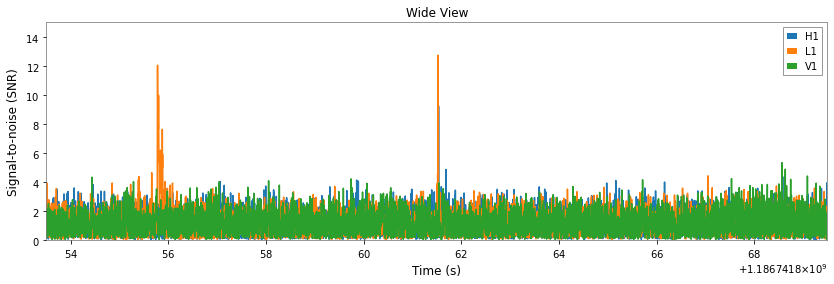

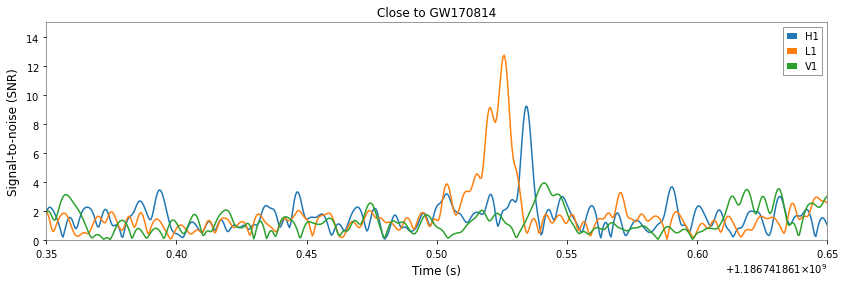

In [233]:
for w, title in [(8, 'Wide View'), (.15, 'Close to GW170814')]:
    pylab.figure(figsize=[14, 4])
    for ifo in ifos:
        pylab.plot(snr[ifo].sample_times, abs(snr[ifo]), label=ifo)

    pylab.legend()
    pylab.title(title)
    pylab.grid()
    pylab.xlim(m.time - w, m.time + w)
    pylab.ylim(0, 15)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Signal-to-noise (SNR)')
    pylab.show()

In [234]:
from pycbc.vetoes import power_chisq

chisq = {}
for ifo in ifos:
    # The number of bins to use. In principle, this choice is arbitrary. In practice,
    # this is empirically tuned.
    nbins = 26
    chisq[ifo] = power_chisq(hp, data[ifo], nbins, psd[ifo], low_frequency_cutoff=20.0)
    chisq[ifo] = chisq[ifo].crop(5, 4)
    
    dof = nbins * 2 - 2
    chisq[ifo] /= dof

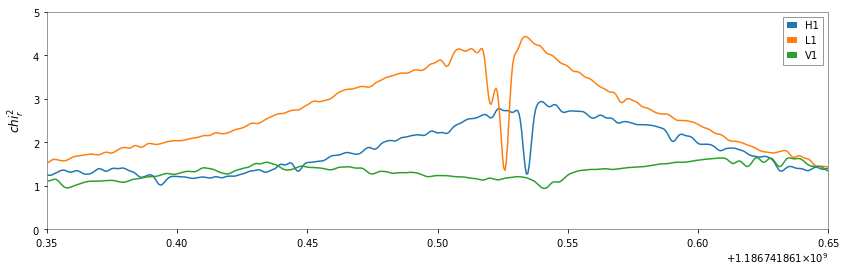

In [235]:
pylab.figure(figsize=[14, 4])

for ifo in ifos:
    pylab.plot(chisq[ifo].sample_times, chisq[ifo], label=ifo)
    
pylab.legend()
pylab.grid()
pylab.xlim(m.time -0.15, m.time + 0.15)
pylab.ylim(0, 5)
pylab.ylabel('$chi^2_r$')
pylab.show()

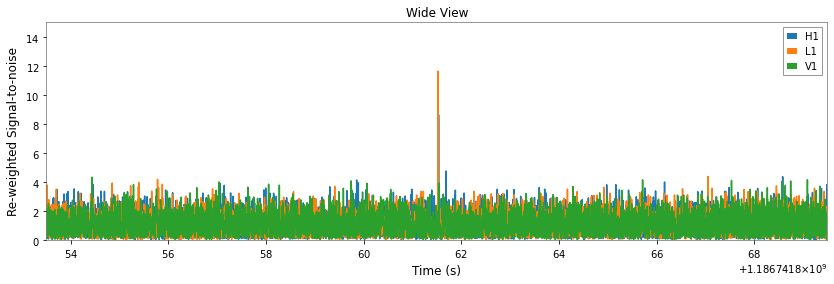

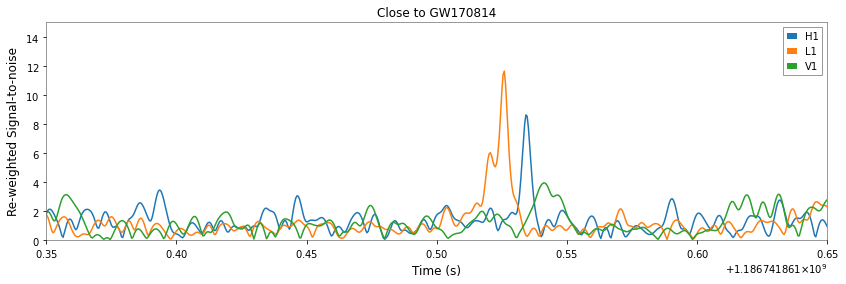

In [236]:
from pycbc.events.ranking import newsnr

# The rho-hat term above is named "newsnr" here
nsnr = {ifo:newsnr(abs(snr[ifo]), chisq[ifo]) for ifo in ifos}

# Show a couple sizes
for w, title in [(8, 'Wide View'), (.15, 'Close to GW170814')]:
    pylab.figure(figsize=[14, 4])
    for ifo in ifos:
        pylab.plot(snr[ifo].sample_times, nsnr[ifo], label=ifo)

    pylab.legend()
    pylab.title(title)
    pylab.grid()
    pylab.xlim(m.time - w, m.time + w)
    pylab.ylim(0, 15)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Re-weighted Signal-to-noise')
    pylab.show()

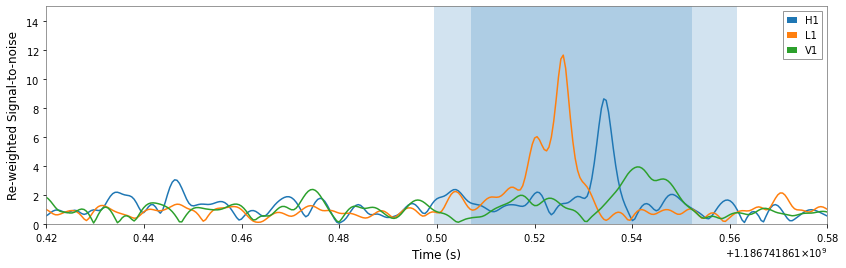

Virgo Peak has a statistic value of 3.924501098303096


In [237]:
import numpy
from pycbc.detector import Detector

# Calculate the time of flight between the Virgo detectors and each LIGO observatory
d = Detector("V1")
tof = {}
tof['H1'] = d.light_travel_time_to_detector(Detector("H1"))
tof['L1'] = d.light_travel_time_to_detector(Detector("L1"))

# Record the time of the peak in the LIGO observatories
ptime = {}

pylab.figure(figsize=[14, 4])
for ifo in ifos:
    
    # shade the region around each LIGO peak that could have a peak in Virgo if from
    # an astrophysical source
    if ifo != 'V1':
        ptime[ifo] = snr[ifo].sample_times[nsnr[ifo].argmax()]
        pylab.axvspan(ptime[ifo] - tof[ifo], ptime[ifo] + tof[ifo], alpha=0.2, lw=10)
        
    pylab.plot(snr[ifo].sample_times, nsnr[ifo], label=ifo)

# Calculate the span of time that a Virgo peak could in principle happen in from time of flight
# considerations.
start = ptime['H1'] - tof['H1']
end = ptime['L1'] + tof['L1']

# convert the times to indices along with how large the region is in number of samples
window_size = int((end - start) * snr['V1'].sample_rate)
sidx = int((start - snr['V1'].start_time) * snr['V1'].sample_rate)
eidx = sidx + window_size

# Calculate the "on-source" peak re-weighted (newsnr) statistic value.
onsource = nsnr['V1'][sidx:eidx].max()

pylab.legend()
pylab.grid()
pylab.xlim(m.time - .08, m.time + .08)
pylab.ylim(0, 15)
pylab.xlabel('Time (s)')
pylab.ylabel('Re-weighted Signal-to-noise')
pylab.show()

print('Virgo Peak has a statistic value of {}'.format(onsource))


In [238]:
peaks = []
i = 0
while i + window_size < len(nsnr['V1']):
    p = nsnr['V1'][i:i+window_size].max()
    peaks.append(p)
    i += window_size
    
    # Skip past the onsource time
    if abs(i - sidx) < window_size:
        i += window_size * 2
    
peaks = numpy.array(peaks)


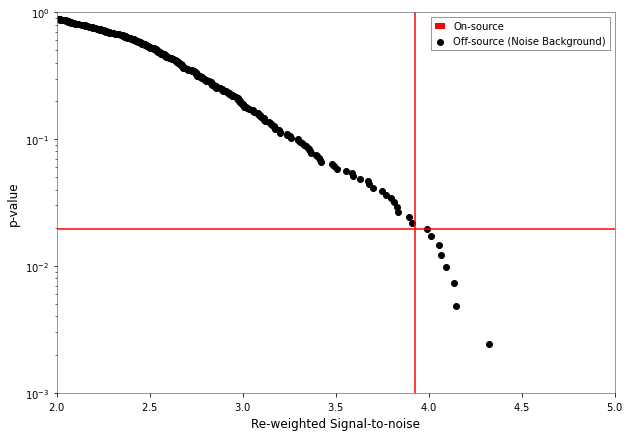

The p-value associated with the GW170814 peak is 0.01951219512195122


In [239]:
pcurve = numpy.arange(1, len(peaks)+1)[::-1] / float(len(peaks))
peaks.sort()

pvalue = (peaks > onsource).sum() / float(len(peaks))

pylab.figure(figsize=[10, 7])
pylab.scatter(peaks, pcurve, label='Off-source (Noise Background)', color='black')

pylab.axvline(onsource, label='On-source', color='red')
pylab.axhline(pvalue, color='red')

pylab.legend()
pylab.yscale('log')
pylab.grid()
pylab.ylim(1e-3, 1e0)
pylab.ylabel('p-value')
pylab.xlabel('Re-weighted Signal-to-noise')

pylab.xlim(2, 5)
pylab.show()

print("The p-value associated with the GW170814 peak is {}".format(pvalue))

##**Parameter Estimatation for compact object mergers**

In [240]:
! pip install -q 'corner==2.0.1' 'bilby==1.0.4' 'astropy==4.0.3'

     |████████████████████████████████| 11.6 MB 9.3 MB/s 
     |████████████████████████████████| 10.2 MB 17.0 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 


In [241]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import corner

In [242]:
label = 'GW150914'

# if you do not have wget installed, simply download manually 
# https://dcc.ligo.org/LIGO-P1800370/public/GW150914_GWTC-1.hdf5 
# from your browser
! wget https://dcc.ligo.org/LIGO-P1800370/public/{label}_GWTC-1.hdf5

--2021-10-28 12:25:26--  https://dcc.ligo.org/LIGO-P1800370/public/GW150914_GWTC-1.hdf5
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dcc.ligo.org/public/0157/P1800370/005/GW150914_GWTC-1.hdf5 [following]
--2021-10-28 12:25:27--  https://dcc.ligo.org/public/0157/P1800370/005/GW150914_GWTC-1.hdf5
Reusing existing connection to dcc.ligo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 7026464 (6.7M)
Saving to: ‘GW150914_GWTC-1.hdf5’

GW150914_GWTC-1.hdf 100%[===================>]   6.70M  28.0MB/s    in 0.2s    

2021-10-28 12:25:27 (28.0 MB/s) - ‘GW150914_GWTC-1.hdf5’ saved [7026464/7026464]



In [243]:
posterior_file = './'+label+'_GWTC-1.hdf5'
posterior = h5py.File(posterior_file, 'r')

In [244]:
print('This file contains four datasets: ',posterior.keys())

This file contains four datasets:  <KeysViewHDF5 ['IMRPhenomPv2_posterior', 'Overall_posterior', 'SEOBNRv3_posterior', 'prior']>


In [245]:
print(posterior['Overall_posterior'].dtype.names)

('costheta_jn', 'luminosity_distance_Mpc', 'right_ascension', 'declination', 'm1_detector_frame_Msun', 'm2_detector_frame_Msun', 'spin1', 'spin2', 'costilt1', 'costilt2')


##Here are some brief descriptions of these parameters and their uses:


1. **luminosity_distance_Mpc: luminosity distance [Mpc]**
2. **m1_detector_frame_Msun: primary (larger) black hole mass (detector frame) [solar mass]**
3. **m2_detector_frame_Msun: secondary (smaller) black hole mass (detector frame) [solar mass]**
4. **right_ascension, declination: right ascension and declination of the source [rad]**.
5. **costheta_jn: cosine of the angle between line of sight and total angular momentum vector of system**.
6. **spin1, costilt1: primary (larger) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.**
7. **spin2, costilt2: secondary (smaller) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.**




In [247]:
samples=pd.DataFrame.from_records(np.array(posterior['Overall_posterior']))

samples

,costheta_jn,luminosity_distance_Mpc,right_ascension,declination,m1_detector_frame_Msun,m2_detector_frame_Msun,spin1,spin2,costilt1,costilt2
0,-0.976633,517.176717,1.456176,-1.257815,39.037380,37.044563,0.417147,0.867740,-0.280624,0.403853
1,-0.700404,401.626864,2.658802,-0.874661,34.620096,34.184416,0.125709,0.260679,-0.757349,-0.312285
2,-0.840752,369.579071,1.106548,-1.136396,37.894343,33.970520,0.581047,0.926893,0.649781,-0.510843
3,-0.583657,386.935268,2.077180,-1.246351,36.412973,35.684463,0.235808,0.094391,0.116578,-0.720505
4,-0.928271,345.104345,0.993604,-1.069243,39.477251,31.645008,0.511521,0.868009,-0.438237,0.269333
...,...,...,...,...,...,...,...,...,...,...
8345,-0.691637,306.985025,1.485646,-1.269228,37.561962,33.355792,0.484003,0.627191,0.194507,-0.408345
8346,-0.834615,462.649414,2.065362,-1.265618,37.824298,36.674075,0.589654,0.650758,-0.737792,0.875384
8347,-0.911463,448.930876,1.536913,-1.257956,38.063291,35.757913,0.708407,0.714805,0.852085,-0.797475
8348,-0.856914,561.020036,2.367289,-1.211824,44.884396,31.592433,0.389284,0.521304,-0.251461,0.830526


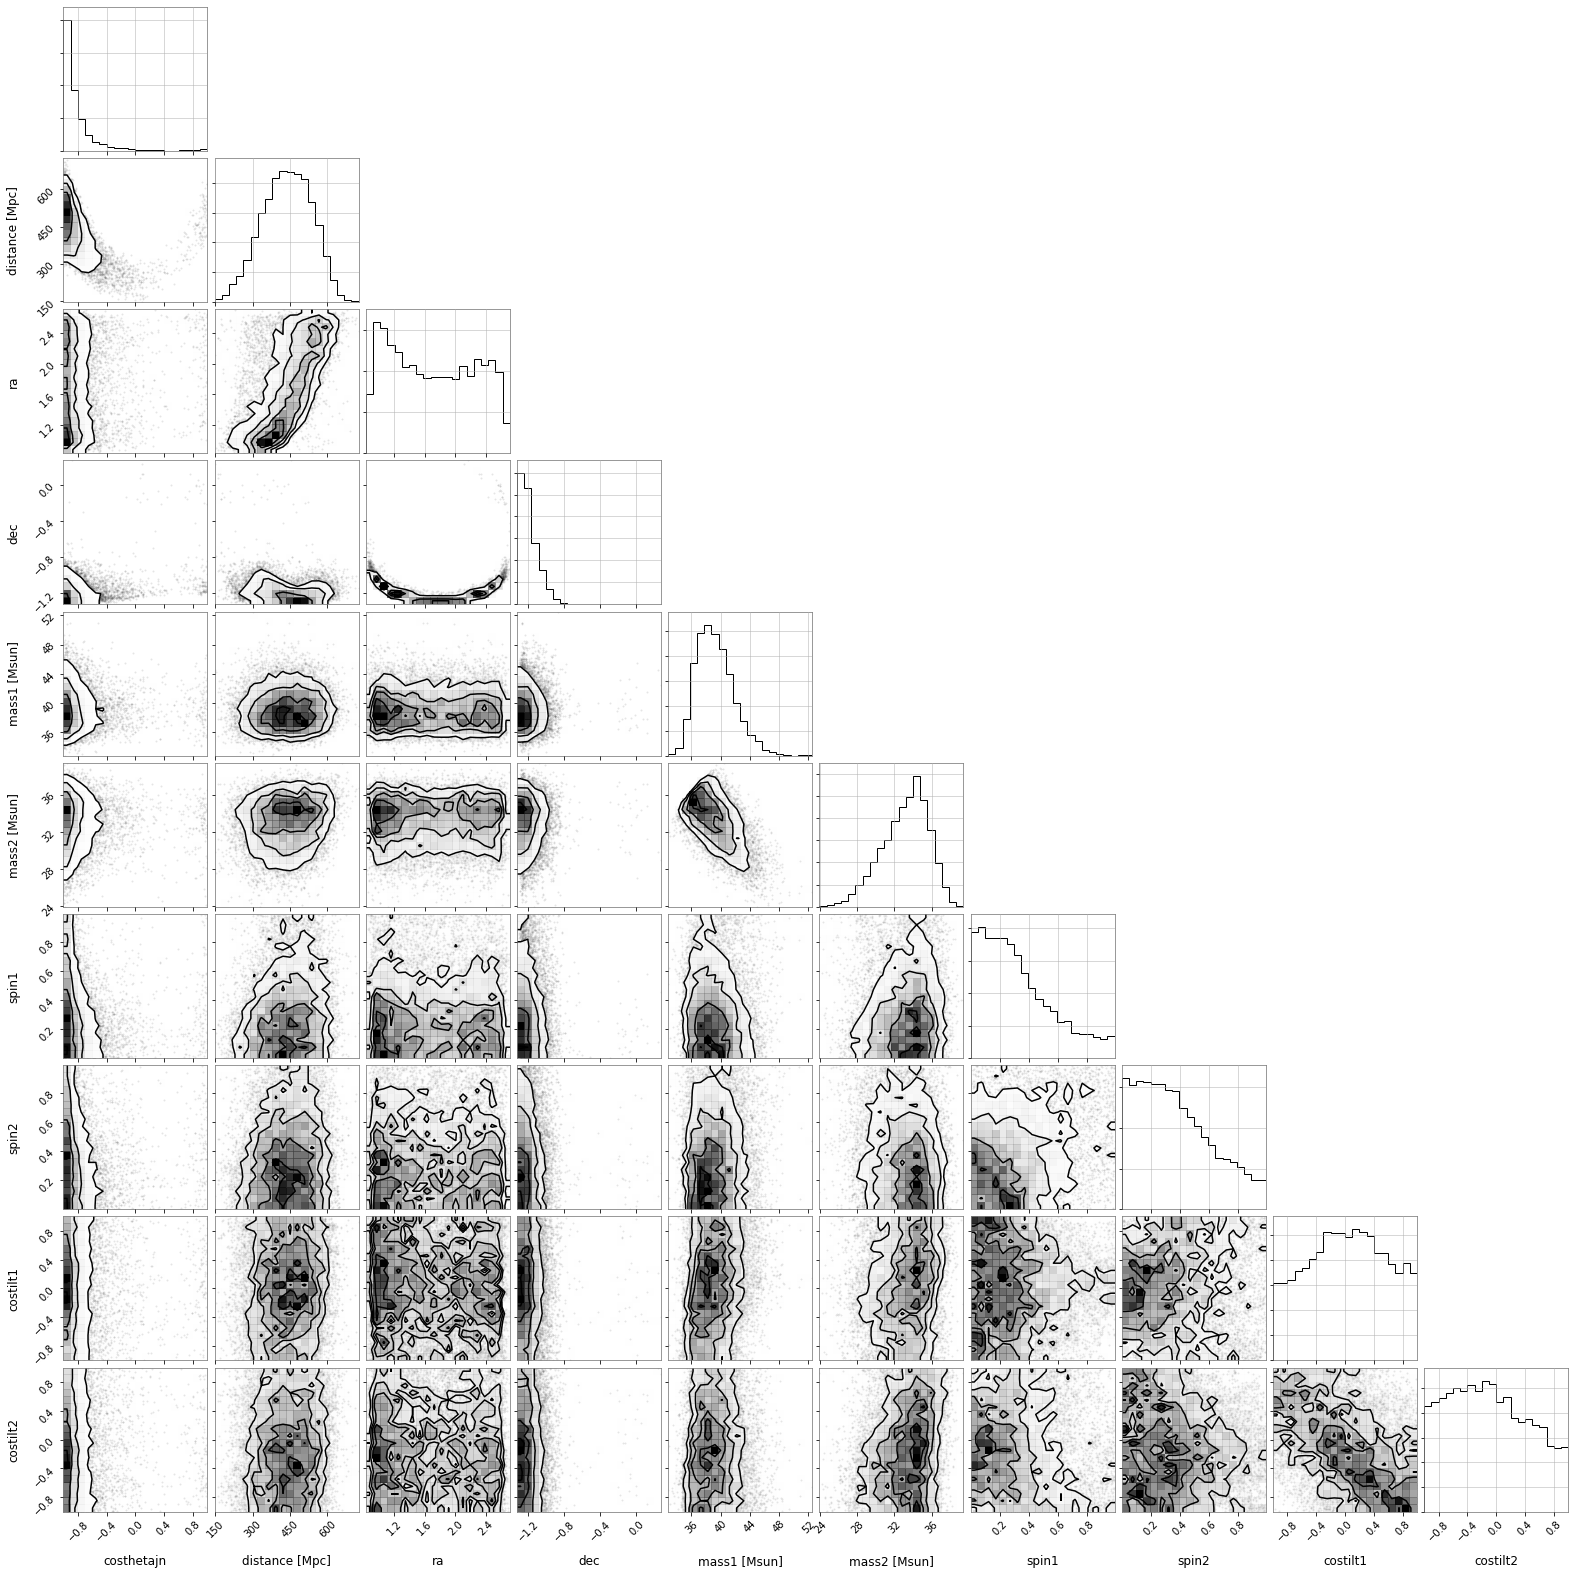

In [248]:
corner.corner(samples,labels=['costhetajn','distance [Mpc]','ra','dec', 'mass1 [Msun]','mass2 [Msun]','spin1','spin2','costilt1','costilt2']);

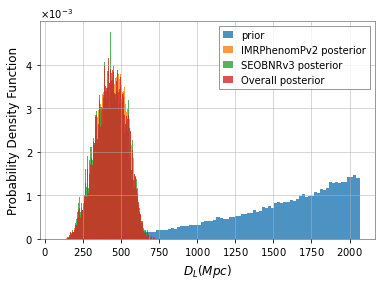

In [249]:
plt.hist(posterior['prior']['luminosity_distance_Mpc'], bins = 100, label='prior', alpha=0.8, density=True)
plt.hist(posterior['IMRPhenomPv2_posterior']['luminosity_distance_Mpc'], bins = 100, label='IMRPhenomPv2 posterior', alpha=0.8, density=True)
plt.hist(posterior['SEOBNRv3_posterior']['luminosity_distance_Mpc'], bins = 100, label='SEOBNRv3 posterior', alpha=0.8, density=True)
plt.hist(posterior['Overall_posterior']['luminosity_distance_Mpc'], bins = 100, label='Overall posterior', alpha=0.8, density=True)
plt.xlabel(r'$D_L (Mpc)$')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

In [250]:
import astropy.units as u
from astropy.cosmology import Planck15, z_at_value

In [252]:
z = np.array([z_at_value(Planck15.luminosity_distance, dist * u.Mpc) for dist in samples['luminosity_distance_Mpc']])
z

array([0.10821385, 0.08532888, 0.07886647, ..., 0.09477424,
       0.11673685, 0.10869531])

In [253]:
samples['m1_source_frame_Msun']=samples['m1_detector_frame_Msun']/(1.0+z)
samples['m2_source_frame_Msun']=samples['m2_detector_frame_Msun']/(1.0+z)
samples['redshift']=z

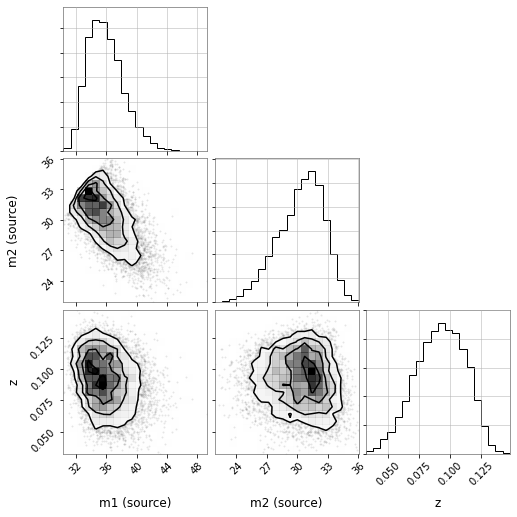

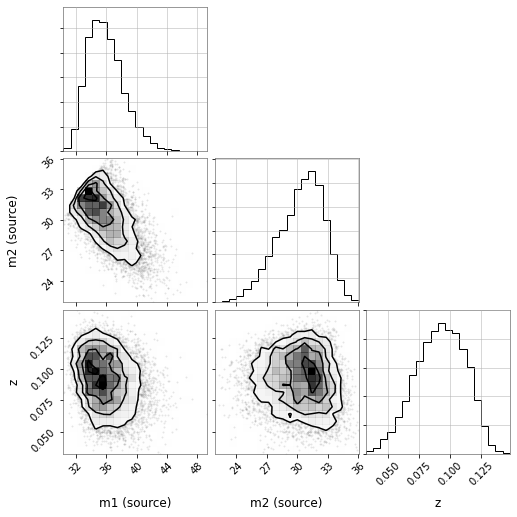

In [254]:
corner.corner(samples[['m1_source_frame_Msun','m2_source_frame_Msun','redshift']],labels=['m1 (source)', 'm2 (source)', 'z'])


In [255]:
import bilby
# calculate the detector frame chirp mass
mchirp = ((samples['m1_detector_frame_Msun'] * samples['m2_detector_frame_Msun'])**(3./5))/\
         (samples['m1_detector_frame_Msun'] + samples['m2_detector_frame_Msun'])**(1./5)
# initialize a SampleSummary object to describe the chirp mass posterior samples
chirp_mass_samples_summary = bilby.core.utils.SamplesSummary(samples=mchirp, average='median')
print('The median chirp mass = {} Msun'.format(chirp_mass_samples_summary.median))
print('The 90% confidence interval for the chirp mass is {} - {} Msun'.format(chirp_mass_samples_summary.lower_absolute_credible_interval,
                                                                        chirp_mass_samples_summary.upper_absolute_credible_interval))

The median chirp mass = 31.23055308109465 Msun
The 90% confidence interval for the chirp mass is 29.655877108464615 - 32.97324559242388 Msun


In [256]:
from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries


In [258]:
time_of_event = 1126259462.4 # trigger time of the event

In [259]:
# Empty interfreometers i.e no strain data

H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")

In [260]:
post_trigger_duration = 2
duration = 4
analysis_start = time_of_event + post_trigger_duration - duration

In [261]:
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

L1_analysis_data = TimeSeries.fetch_open_data(
    "L1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

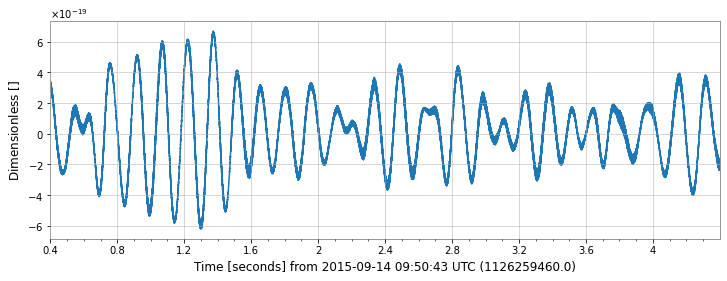

In [262]:
H1_analysis_data.plot()
plt.show()

In [263]:
# Passing the strain data to H1 and L1 bilby interfrometers object.
H1.set_strain_data_from_gwpy_timeseries(H1_analysis_data)
L1.set_strain_data_from_gwpy_timeseries(L1_analysis_data)

In [264]:
psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration

H1_psd_data = TimeSeries.fetch_open_data(
    "H1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

L1_psd_data = TimeSeries.fetch_open_data(
    "L1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

In [265]:
psd_alpha = 2 * H1.strain_data.roll_off / duration
H1_psd = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")
L1_psd = L1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [266]:
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)
L1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=L1_psd.value)

12:55 bilby INFO    : Generating frequency domain strain from given time domain strain.
12:55 bilby INFO    : Applying a tukey window with alpha=0.1, roll off=0.2


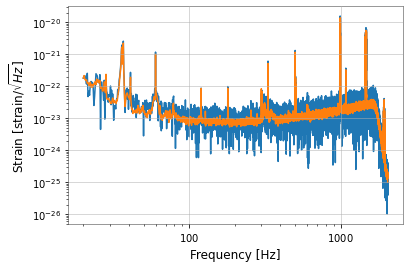

In [267]:
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [268]:
H1.maximum_frequency = 1024
L1.maximum_frequency = 1024

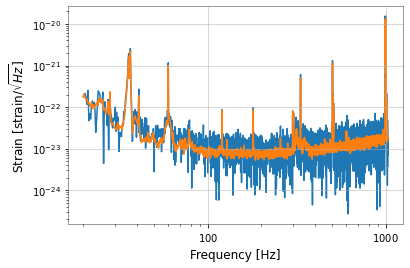

In [269]:
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [270]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=30.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = 412.066

In [271]:
# First, put our "data" created above into a list of intererometers (the order is arbitrary)
interferometers = [H1, L1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='IMRPhenomPv2', reference_frequency=100., catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=True, distance_marginalization=False)


12:56 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [272]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='short', label="GW150914",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    sample="unif", nlive=500, dlogz=3  # <- Arguments are used to make things fast - not recommended for general use
)

12:56 bilby INFO    : Running for label 'GW150914', output will be saved to 'short'
12:56 bilby INFO    : Using lal version 7.1.2
12:56 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
12:56 bilby INFO    : Using lalsimulation version 2.5.1
12:56 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
12:56 bilby INFO    : Search parameters:
12:56 bilby INFO    :   chirp_mass = Uniform(minimum=30.0, maximum=32.5, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
12:56 bilby INFO    :   mass_ratio = Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
12:56 bilby INFO    :   time_jitter = Uniform(minimum=-0.000244140625, maximum=0.00024

0it [00:00, ?it/s]

12:56 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f2df846a090>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:56 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:56 bilby INFO    : Using dynesty version 1.1
12:56 bilby INFO    : Resume file short/GW150914_resume.pickle do

899it [00:52,  9.80it/s, bound:0 nc: 12 ncall:3.1e+03 eff:29.0% logz-ratio=266.25+/-0.08 dlogz:3.008>3]

12:57 bilby INFO    : Written checkpoint file short/GW150914_resume.pickle
12:57 bilby INFO    : Writing 196 current samples to short/GW150914_samples.dat


900it [00:55, 16.18it/s, bound:0 nc:  1 ncall:3.1e+03 eff:45.1% logz-ratio=268.21+/-0.12 dlogz:0.005>3]

12:57 bilby INFO    : Sampling time: 0:00:42.406827
12:57 bilby INFO    : Reconstructing marginalised parameters.




100%|██████████| 1400/1400 [00:45<00:00, 30.72it/s]

12:58 bilby INFO    : Generating sky frame parameters.



100%|██████████| 1400/1400 [00:00<00:00, 3328.23it/s]


12:58 bilby INFO    : Computing SNRs for every sample.


100%|██████████| 1400/1400 [00:21<00:00, 64.66it/s]


12:58 bilby INFO    : Summary of results:
nsamples: 1400
ln_noise_evidence: -8534.562
ln_evidence: -8266.348 +/-  0.118
ln_bayes_factor: 268.213 +/-  0.118



In [275]:
result_short.posterior.head()

,chirp_mass,mass_ratio,time_jitter,phase,geocent_time,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,dec,ra,theta_jn,psi,luminosity_distance,log_likelihood,log_prior,reference_frequency,waveform_approximant,minimum_frequency,total_mass,mass_1,mass_2,symmetric_mass_ratio,iota,spin_1x,spin_1y,spin_1z,spin_2x,spin_2y,spin_2z,phi_1,phi_2,chi_eff,chi_1_in_plane,chi_2_in_plane,chi_p,cos_tilt_1,cos_tilt_2,redshift,comoving_distance,mass_1_source,mass_2_source,chirp_mass_source,total_mass_source,H1_matched_filter_snr,H1_optimal_snr,L1_matched_filter_snr,L1_optimal_snr
0,30.524407,0.681314,0.000187,1.506781,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,263.425608,7.401475,100.0,IMRPhenomPv2,20.0,71.683212,42.635236,29.047976,0.241018,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938181,39.207600,26.712680,28.070414,65.920280,19.937407-0.299136j,13.964761,14.343027-0.109427j,9.916322
1,31.732161,0.696481,0.000233,4.304345,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,264.446397,7.401475,100.0,IMRPhenomPv2,20.0,74.338343,43.819142,30.519202,0.241998,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938181,40.296326,28.065628,29.181071,68.361954,19.717666-2.004843j,14.449956,13.792981-1.493372j,10.243231
2,31.213872,0.680835,-0.000203,4.496713,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,264.801993,7.401475,100.0,IMRPhenomPv2,20.0,73.308204,43.614147,29.694058,0.240986,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938181,40.107812,27.306820,28.704450,67.414632,19.940552-1.816426j,14.224570,14.154643-1.133291j,10.089107
3,32.428890,0.825932,-0.000101,4.646227,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,265.084856,7.401475,100.0,IMRPhenomPv2,20.0,74.911247,41.026305,33.884942,0.247728,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938181,37.728018,31.160781,29.821787,68.888799,19.869378-0.614541j,14.888878,13.745248-0.348041j,10.560151
4,32.276975,0.830066,0.000126,4.896475,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,265.439431,7.401475,100.0,IMRPhenomPv2,20.0,74.539309,40.730404,33.808905,0.247844,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938181,37.455906,31.090857,29.682085,68.546763,19.313141-4.885213j,14.834194,13.487809-3.161179j,10.524348


In [277]:
result_short.posterior["chirp_mass"].head()

0    30.524407
1    31.732161
2    31.213872
3    32.428890
4    32.276975
Name: chirp_mass, dtype: float64

In [278]:
Mc = result_short.posterior["chirp_mass"].values

In [279]:
lower_bound = np.quantile(Mc, 0.05)
upper_bound = np.quantile(Mc, 0.95)
median = np.quantile(Mc, 0.5)
print("Mc = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))

Mc = 31.444708862152392 with a 90% C.I = 30.95716018031802 -> 31.968527079867993


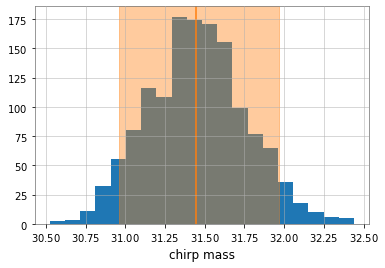

In [280]:
fig, ax = plt.subplots()
ax.hist(result_short.posterior["chirp_mass"], bins=20)
ax.axvspan(lower_bound, upper_bound, color='C1', alpha=0.4)
ax.axvline(median, color='C1')
ax.set_xlabel("chirp mass")
plt.show()

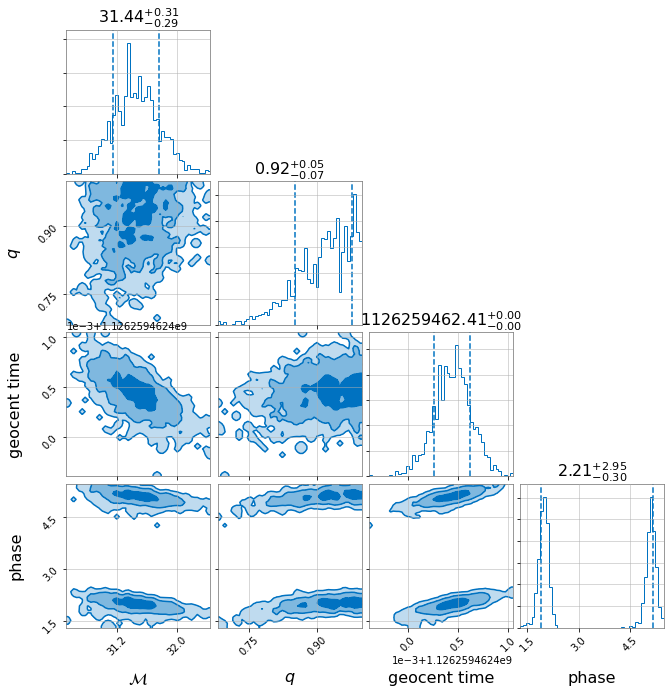

In [281]:
result_short.plot_corner(parameters=["chirp_mass", "mass_ratio", "geocent_time", "phase"], prior=True)

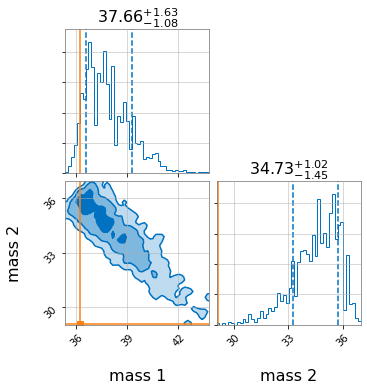

In [282]:
parameters = dict(mass_1=36.2, mass_2=29.1)
result_short.plot_corner(parameters)

In [283]:
result_short.priors

{'a_1': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'a_2': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'chirp_mass': Uniform(minimum=30.0, maximum=32.5, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None),
 'dec': DeltaFunction(peak=-1.2232, name=None, latex_label=None, unit=None),
 'geocent_time': Uniform(minimum=1126259462.3000002, maximum=1126259462.5, name='geocent_time', latex_label='$t_c$', unit=None, boundary=None),
 'luminosity_distance': DeltaFunction(peak=412.066, name=None, latex_label=None, unit=None),
 'mass_ratio': Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None),
 'phase': Uniform(minimum=0, maximum=6.283185307179586, name='phase', latex_label='$\\phi$', unit=None, boundary=None),
 'phi_12': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'phi_jl': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'psi': DeltaFunction(peak=0.

In [284]:
result_short.sampler_kwargs["nlive"]

500

In [285]:
print("ln Bayes factor = {} +/- {}".format(
    result_short.log_bayes_factor, result_short.log_evidence_err))

ln Bayes factor = 268.21322379655027 +/- 0.11846629294865026
